In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
def tracer_id_to_name(id):
    tracer_id =  "0"+str(id) if len(str(id)) < 2 else str(id)
    tracer_name = "TRAC"+tracer_id 
    return tracer_name

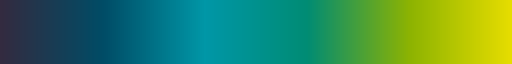

In [2]:
##############################
# COLOR PALETTE 
##############################

yellow = '#E6DD00'
green = '#8CB302'
teal='#008C74'
light_blue = "#0097A7"
blue = '#004C66'
purple = '#332B40'
my_colors = [yellow, green, teal, light_blue, blue, purple]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

my_cmap = LinearSegmentedColormap.from_list("ProSynFest", colors=my_colors[::-1])
my_rev_cmap = LinearSegmentedColormap.from_list("RevProSynFest", colors=my_colors)

my_cmap

In [3]:
size_dict = dict({
    # pico 
    "TRAC21" : ("s2", 0.6, 2),
    "TRAC22" :("s3", 0.9, 3),
    "TRAC23" : ("s4", 1.4, 4),
    "TRAC24" : ("s5", 2, 5),
    # cocco
    "TRAC25" : ("s6", 3.0, 6),
    "TRAC26" : ("s7", 4.5, 7),
    "TRAC27" : ("s8", 6.6, 8),
    "TRAC28" : ("s9", 10, 9),
    "TRAC29" : ("s10", 15, 10),
    # diazotroph
    "TRAC30" : ("s6", 3.0, 6),
    "TRAC31" : ("s7", 4.5, 7),
    "TRAC32" : ("s8", 6.6, 8),
    "TRAC33" : ("s9", 10, 9),
    "TRAC34" : ("s10", 15, 10),
    #diatom
    "TRAC35" : ("s6", 3.0, 6),
    "TRAC36" : ("s7", 4.5, 7),
    "TRAC37" : ("s8", 6.6, 8),
    "TRAC38" : ("s9", 10, 9),
    "TRAC39" : ("s10", 15, 10),
    "TRAC40" : ("s11", 22, 11),
    "TRAC41" : ("s12", 32, 12),
    "TRAC42" : ("s13", 47, 13),
    "TRAC43" : ("s14", 70, 14),
    # mixo dino 
    "TRAC44" : ("s8", 6.6, 8),
    "TRAC45" : ("s9", 10, 9),
    "TRAC46" : ("s10", 15, 10),
    "TRAC47" : ("s11", 22, 11),
    "TRAC48" : ("s12", 32, 12),
    "TRAC49" : ("s13", 47, 13),
    "TRAC50" : ("s14", 70, 14),
    "TRAC51" : ("s15", 104, 15),
    # zoo
    "TRAC52" : ("s7", 4.5, 7),
    "TRAC53" : ("s8", 6.6, 8),
    "TRAC54" : ("s9", 10, 9),
    "TRAC55" : ("s10", 15, 10),
    "TRAC56" : ("s11", 22, 11),
    "TRAC57" : ("s12", 32, 12),
    "TRAC58" : ("s13", 47, 13),
    "TRAC59" : ("s14", 70, 14),
    "TRAC60" : ("s15", 104, 15),
    "TRAC61" : ("s16", 154, 16),
    "TRAC62" : ("s17", 228, 17),
    "TRAC63" : ("s18", 338, 18),
    "TRAC64" : ("s19", 502, 19),
    "TRAC65" : ("s20", 744, 20),
    "TRAC66" : ("s21", 1103, 21),
    "TRAC67" : ("s22", 1636, 22),
    # Bacteria
    "TRAC68" : ("s1", 0.4, 1),
    "TRAC69" : ("s2", 0.6, 2),
    "TRAC70" : ("s3", 0.9, 3)
}
)


In [ ]:
########################################
# Run with only pico, zoo, and bacteria 
########################################

In [168]:
coords = [[203, 100], [203, 105], [203, 110], [203, 115], [203, 120], [203, 125], [203, 130], [203, 135], [203, 140], [203, 145]]
lats = [20.5, 25.5, 30.5, 35.5, 40.5, 45.5, 50.5, 55.5, 60.5, 65.5]
ds_list = []
for (lon, lat) in coords:
    # path = "/Users/birdy/Documents/eaps_research/julia stuff/MITgcmTools.jl/3d.gradients-20yrs-203-121.nc"
    config_id =f"gradients-AUG-20yrs-{lon}-{lat}" # CHANGE ME
    ds = xr.open_dataset("3d."+config_id+".nc")
    ds_list.append(ds)

In [169]:
# Tracer IDs
nutrients = range(1,19+1) 
pico = range(21,24+1)
zoo = range(52,67+1)
bacteria = range(68,70+1)

x = 0
y = 0
z = 0
t = 487 # last ummm year-ish?


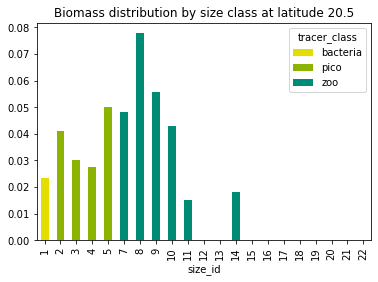

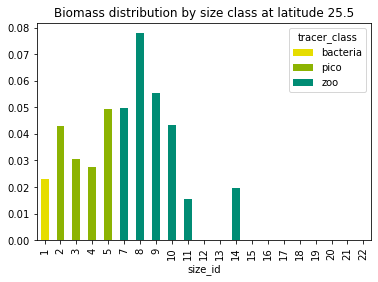

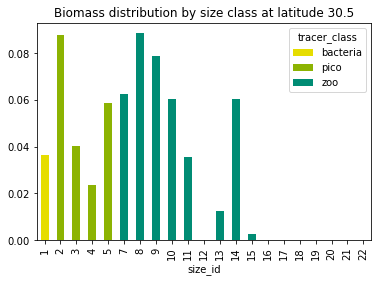

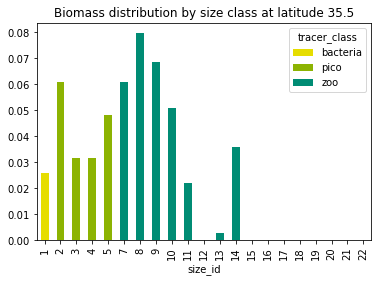

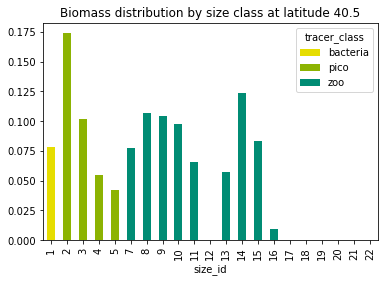

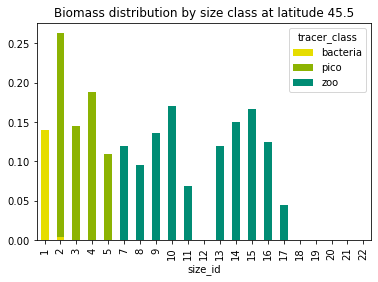

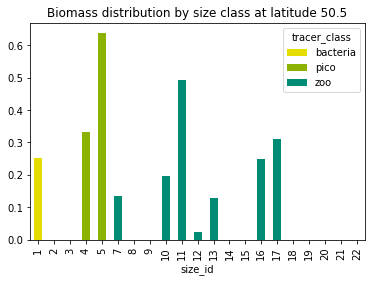

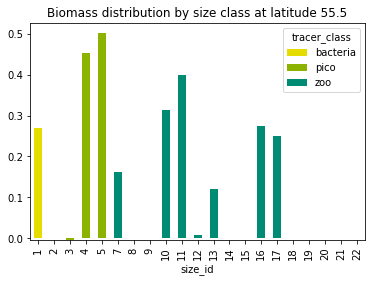

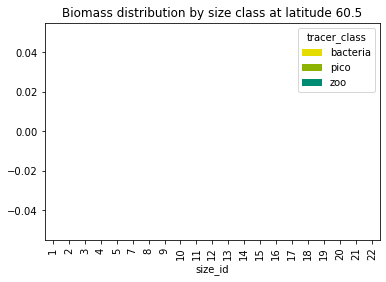

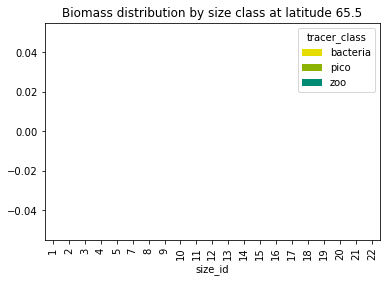

In [171]:
# create a dataframe of avg biomass for each tracer in the last year 
# plot according to size class and type
i=0
for ds in ds_list:
    tracer_names = []
    tracer_classes = []
    size_classes = []
    size_ids = []

    pico_avgs = []
    for tracer_id in pico:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('pico')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        pico_avgs.append(avg)


    zoo_avgs = []
    for tracer_id in zoo:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('zoo')

        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        zoo_avgs.append(avg)

    bact_avgs = []
    for tracer_id in bacteria:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('bacteria')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        bact_avgs.append(avg)

    data = {
        'tracer_name': tracer_names,
        'tracer_class': tracer_classes,
        'avg_biomass': pico_avgs + zoo_avgs + bact_avgs,
        'size_class': size_classes, 
        'size_id': size_ids
    }
    com_df = pd.DataFrame(data)
    
    lat = lats[i]
    title = f"Biomass distribution by size class at latitude {lat}"
    com_df.groupby(['size_id', 'tracer_class'])['avg_biomass'].sum().unstack().plot(kind='bar', stacked=True, title=title, color=my_colors)
    plt.savefig(f'barchart-{lat}.png')
    plt.show()
    i+=1

In [ ]:
########################################
# Run with all plankton
########################################

In [172]:
coords = [[203, 100], [203, 105], [203, 110], [203, 115], [203, 120], [203, 125], [203, 130], [203, 135]]
lats = [20.5, 25.5, 30.5, 35.5, 40.5, 45.5, 50.5, 55.5]
ds_list = []
for (lon, lat) in coords:
    # path = "/Users/birdy/Documents/eaps_research/julia stuff/MITgcmTools.jl/3d.gradients-20yrs-203-121.nc"
    config_id =f"gradients-all-plankton-AUG-20yrs-{lon}-{lat}" # CHANGE ME
    ds = xr.open_dataset("3d."+config_id+".nc")
    ds_list.append(ds)

In [173]:
# Tracer IDs
nutrients = range(1,19+1) 
pico = range(21,24+1)
cocco = range(25,29+1)
diazo = range(30, 34+1)
diatom = range(35,43+1)
mixo_dino = range(44, 51+1)
zoo = range(52,67+1)
bacteria = range(68,70+1)

x = 0
y = 0
z = 0
t = 200 

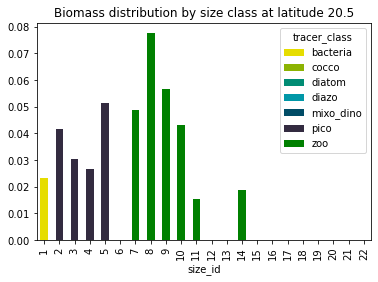

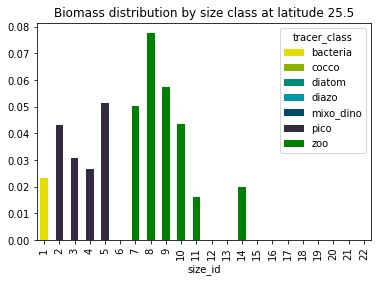

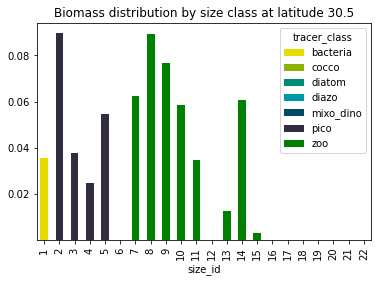

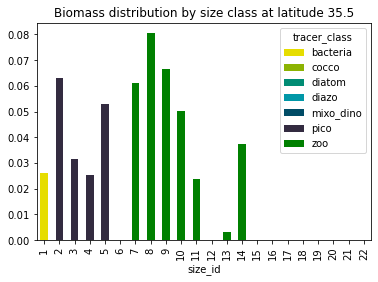

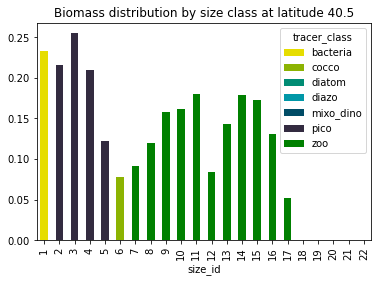

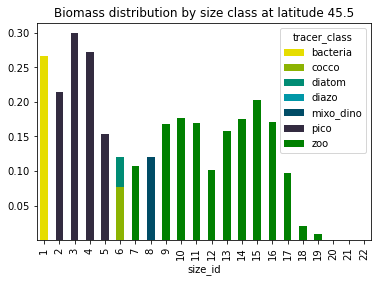

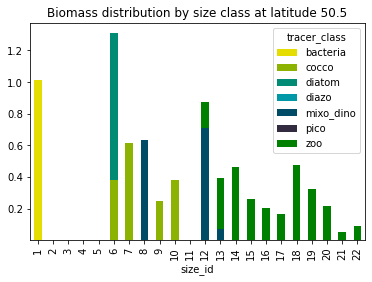

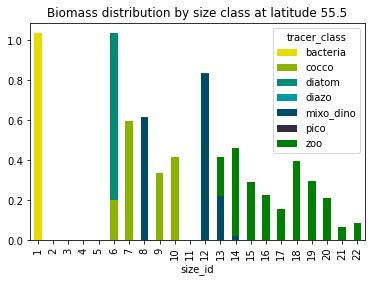

In [191]:
# create a dataframe of avg biomass for each tracer in the last year 
# plot according to size class and type
i=0
for ds in ds_list:
    tracer_names = []
    tracer_classes = []
    size_classes = []
    size_ids = []

    pico_avgs = []
    for tracer_id in pico:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('pico')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        pico_avgs.append(avg)

    cocco_avgs = []
    for tracer_id in cocco:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('cocco')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        cocco_avgs.append(avg)

    diazo_avgs = []
    for tracer_id in diazo:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('diazo')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        diazo_avgs.append(avg)
        
    diatom_avgs = []
    for tracer_id in diatom:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('diatom')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        diatom_avgs.append(avg)
        
    mixo_dino_avgs = []
    for tracer_id in mixo_dino:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('mixo_dino')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        mixo_dino_avgs.append(avg)
        
    zoo_avgs = []
    for tracer_id in zoo:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('zoo')

        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        zoo_avgs.append(avg)

    bact_avgs = []
    for tracer_id in bacteria:
        tracer = tracer_id_to_name(tracer_id)
        tracer_names.append(tracer)
        size_classes.append(size_dict[tracer][0])
        size_ids.append(size_dict[tracer][2])
        tracer_classes.append('bacteria')
        avg = float(ds[tracer].isel(X=x, Y=y, Zmd000001=z, T=slice(t,-1)).mean().data)
        bact_avgs.append(avg)

    data = {
        'tracer_name': tracer_names,
        'tracer_class': tracer_classes,
        'avg_biomass': pico_avgs + cocco_avgs + diazo_avgs + diatom_avgs + mixo_dino_avgs + zoo_avgs + bact_avgs,
        'size_class': size_classes, 
        'size_id': size_ids
    }
    com_df = pd.DataFrame(data)
    
    lat = lats[i]
    title = f"Biomass distribution by size class at latitude {lat}"
    com_df.groupby(['size_id', 'tracer_class'])['avg_biomass'].sum().unstack().plot(kind='bar', stacked=True, title=title, color=my_colors+['green'])
    plt.savefig(f'barchart-all-{lat}.png')
    plt.show()
    i+=1

In [189]:
plt.get_cmap("viridis")(range(7))

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ],
       [0.271305, 0.019942, 0.347269, 1.      ],
       [0.272594, 0.025563, 0.353093, 1.      ],
       [0.273809, 0.031497, 0.358853, 1.      ],
       [0.274952, 0.037752, 0.364543, 1.      ]])

In [ ]:
########################################
# Pro over Nutrients/Time space
########################################

In [283]:
float(ds["TRAC69"].isel(T=slice(-num_years,-1), X=0, Y=0, Zmd000001=0).mean().data)

0.0

In [6]:
# multipliers = [1, 2, 3, 4, 5, 6, 7, 8]
# temp_seeds = [10.0,12.142857142857144,14.285714285714285,16.428571428571427,18.57142857142857,20.714285714285715,22.857142857142858,25.0]

# multipliers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# temp_seeds = [8.0,9.8889,11.7778,13.6667,15.5556,17.4444,19.3333,21.2222,23.1111,25.0]

# multipliers = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
# temp_seeds = [6.0,8.1818,10.3636,12.5455,14.7273,16.9091, 19.0909, 21.2727 ,23.4545,25.6364,27.8182,30.0]

multipliers = [0.0,1.6667,3.3333,5.0,6.6667,8.3333,10.0,11.6667,13.3333,15.0]
temp_seeds = [0.0,3.3333,6.6667,10.0,13.3333,16.6667,20.0,23.3333,26.6667,30.0]

num_years = 2

pro_biomass = []
syn_biomass = []
het_biomass = []
pro_table = []
syn_table = []
het_table = []
#pro_syn_ratio_table = []
for temp in temp_seeds:
    pro_rows = []
    syn_rows = []
    het_rows = []
    pro_syn_ratio_rows = []

    for mult in multipliers:
        ds = xr.open_dataset(f"3d.LORES-temp-{temp}-nutrients-{mult}.nc")
        
        pro_biomass = float(ds["TRAC21"].isel(T=slice(-num_years,-1), X=0, Y=0, Zmd000001=0).mean().data)
        pro_rows.append(pro_biomass)
        
        syn_biomass = float(ds["TRAC22"].isel(T=slice(-num_years,-1), X=0, Y=0, Zmd000001=0).mean().data)
        syn_rows.append(syn_biomass)
        
        het_biomass = float(ds["TRAC68"].isel(T=slice(-num_years,-1), X=0, Y=0, Zmd000001=0).mean().data) + \
                        float(ds["TRAC69"].isel(T=slice(-num_years,-1), X=0, Y=0, Zmd000001=0).mean().data) + \
                        float(ds["TRAC70"].isel(T=slice(-num_years,-1), X=0, Y=0, Zmd000001=0).mean().data)
        het_rows.append(het_biomass)
        #pro_syn_ratio_rows.append(pro_biomass/syn_biomass)
        
    pro_table.append(pro_rows)
    syn_table.append(syn_rows)
    het_table.append(het_rows)
    #pro_syn_ratio_table.append(pro_syn_ratio_rows)
    

pro_df = pd.DataFrame(data=pro_table, columns=multipliers, index=temp_seeds)
syn_df = pd.DataFrame(data=syn_table, columns=multipliers, index=temp_seeds)
het_df = pd.DataFrame(data=het_table, columns=multipliers, index=temp_seeds)
#pro_syn_ratio_df = pd.DataFrame(data=pro_syn_ratio_table, columns=multipliers, index=temp_seeds)
pro_df

,0.0000,1.6667,3.3333,5.0000,6.6667,8.3333,10.0000,11.6667,13.3333,15.0000
0.0000,0.0,0.034339,0.009069,3.125951e-07,7.484733e-12,6.807972e-16,1.928171e-18,6.996773e-19,3.498660e-18,1.047891e-17
3.3333,0.0,0.062497,0.058202,3.218822e-02,1.267230e-03,6.114665e-08,2.965869e-14,6.052230e-18,3.674749e-18,6.719254e-17
6.6667,0.0,0.060936,0.131709,1.240412e-01,9.343629e-02,2.660089e-02,2.228929e-03,5.025432e-07,1.302693e-16,2.884751e-17
10.0000,0.0,0.081130,0.163384,1.958476e-01,1.706207e-01,8.473703e-02,2.570409e-02,1.765483e-04,1.434491e-04,4.003351e-15
13.3333,0.0,0.100248,0.158179,2.204829e-01,2.207579e-01,1.413986e-01,1.019962e-01,4.778964e-02,7.313147e-09,9.193214e-13
16.6667,0.0,0.108560,0.173328,2.197622e-01,2.703760e-01,1.820393e-01,1.077969e-01,5.529096e-02,4.949956e-02,5.914243e-02
20.0000,0.0,0.121951,0.188193,2.295249e-01,2.638545e-01,1.977129e-01,1.180472e-01,1.613249e-01,8.624738e-02,6.609604e-02
23.3333,0.0,0.110894,0.205231,2.459920e-01,2.647280e-01,-2.949238e-12,1.866286e-01,1.860097e-01,1.510018e-01,5.030686e-02
26.6667,0.0,0.118013,0.204815,2.497311e-01,2.810962e-01,2.847487e-01,-1.140612e-14,1.885337e-01,2.414007e-02,-1.511598e-12
30.0000,0.0,0.123320,0.216586,2.725992e-01,2.990839e-01,-4.897924e-09,0.000000e+00,-4.306664e-06,-1.558288e-07,-1.060303e-13


[Text(0.5, 15.0, 'nutrient multiplier'), Text(33.0, 0.5, 'temperature (C)')]

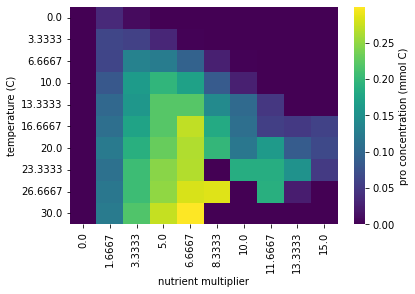

In [7]:
s = sns.heatmap(pro_df, cbar_kws={'label': 'pro concentration (mmol C)'}, cmap='viridis')
s.set(xlabel="nutrient multiplier", ylabel="temperature (C)")

[Text(0.5, 15.0, 'nutrient multiplier'), Text(33.0, 0.5, 'temperature (C)')]

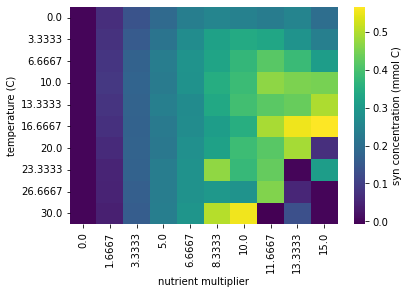

In [8]:
s = sns.heatmap(syn_df, cbar_kws={'label': 'syn concentration (mmol C)'}, cmap="viridis")
s.set(xlabel="nutrient multiplier", ylabel="temperature (C)")

[Text(0.5, 15.0, 'nutrient multiplier'), Text(33.0, 0.5, 'temperature (C)')]

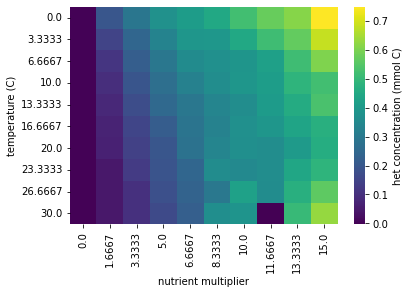

In [9]:
s = sns.heatmap(het_df, cbar_kws={'label': 'het concentration (mmol C)'}, cmap="viridis")
s.set(xlabel="nutrient multiplier", ylabel="temperature (C)")

[Text(0.5, 15.0, 'nutrient multiplier'), Text(33.0, 0.5, 'temperature (C)')]

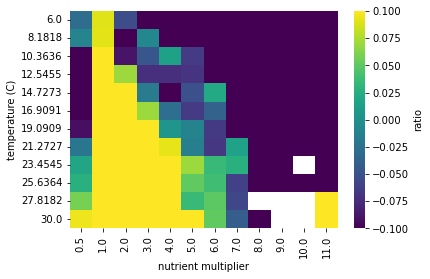

In [19]:
s = sns.heatmap(np.log(pro_syn_ratio_df), cbar_kws={'label': 'ratio'}, cmap="viridis")
s.set(xlabel="nutrient multiplier", ylabel="temperature (C)")

In [17]:
pro_syn_ratio_df

,0.5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
6.0000,0.971388,1.094817,0.947821,0.812234,0.605992,0.466742,0.275617,0.110968,7.830281e-03,2.264025e-04,2.685278e-07,7.812504e-12
8.1818,0.990183,1.095461,0.821125,0.993316,0.869157,0.661656,0.493339,0.324825,2.104038e-01,1.438285e-01,6.812031e-02,1.662318e-05
10.3636,0.857923,1.318114,0.914596,0.954582,1.014715,0.936832,0.694232,0.454912,3.380904e-01,1.558262e-01,9.786491e-02,3.731844e-02
12.5455,0.809996,1.420077,1.072776,0.929378,0.929765,0.932373,0.761069,0.562258,4.226320e-01,2.285095e-01,1.848641e-01,1.271072e-01
14.7273,0.841832,1.395359,1.192030,0.983653,0.902799,0.951143,1.020915,0.551409,5.084581e-01,4.005017e-01,2.767929e-01,1.163458e-01
16.9091,0.874532,1.282397,1.295153,1.072486,0.971939,0.936653,0.963947,0.788124,5.445715e-01,5.096184e-01,2.727182e-01,2.872093e-01
19.0909,0.911807,1.404624,1.458957,1.180473,1.004134,0.989384,0.936246,0.834776,5.725284e-01,4.655020e-01,2.823540e-01,1.656612e-01
21.2727,0.978550,1.460952,1.629732,1.223243,1.097165,0.985662,0.934244,1.015426,7.377207e-01,5.292287e-01,2.866494e-01,3.711740e-01
23.4545,1.017665,1.522576,1.793038,1.318112,1.162144,1.072537,1.035630,1.027078,8.186627e-01,7.228268e-01,0.000000e+00,2.081570e-02
25.6364,1.027147,1.545228,1.911974,1.286578,1.165943,1.052683,1.039312,0.939447,9.042568e-01,4.063835e-02,2.571455e-01,3.509107e-01


In [242]:
flight = sns.load_dataset('flights') # load flights datset from GitHub seaborn repository

# # reshape flights dataset in proper format to create seaborn heatmap
# flights_df = flight.pivot('month', 'year', 'passengers') 

# sns.heatmap(flights_df)# create seaborn heatmap
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [245]:
flights_df = flight.pivot('month', 'year', 'passengers') 
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


NameError: name 'fligts_df' is not defined

In [246]:
df

,1,2,3,4,5,6,7,8
10.000000,0.037527,0.086419,0.149527,0.186875,0.182933,0.159501,0.149007,0.096823
12.142857,0.038902,0.101701,0.136760,0.200966,0.202143,0.211544,0.134269,0.090456
14.285714,0.037273,0.114918,0.156342,0.203508,0.217363,0.235559,0.274443,0.239654
16.428571,0.030370,0.129356,0.157434,0.175966,0.219890,0.152877,0.277454,0.062691
18.571429,0.040986,0.126245,0.182581,0.184452,0.191530,0.242783,0.317162,0.153065
20.714286,0.042514,0.141010,0.176204,0.194195,0.205969,0.262701,0.222181,0.404083
22.857143,0.045808,0.109312,0.205434,0.216796,0.235156,0.226844,0.300627,0.177567
25.000000,0.046424,0.135400,0.224579,0.214270,0.263834,0.239394,0.231453,0.349544


In [262]:
ds["TRAC21"]

<xarray.DataArray 'TRAC21' (T: 20, Zmd000001: 1, Y: 1, X: 1)>
array([[[[0.332619]]],


       [[[0.245259]]],


       [[[0.248318]]],


       [[[0.392154]]],


       [[[0.207418]]],


       [[[0.329774]]],


       [[[0.344705]]],


       [[[0.331781]]],


       [[[0.202879]]],


       [[[0.232352]]],


       [[[0.301546]]],


       [[[0.323918]]],


       [[[0.268788]]],


       [[[0.328648]]],


       [[[0.216196]]],


       [[[0.399337]]],


       [[[0.188402]]],


       [[[0.243851]]],


       [[[0.16859 ]]],


       [[[0.349544]]]], dtype=float32)
Coordinates:
  * T        (T) datetime64[ns] 2000-12-26 2001-12-21 ... 2018-09-23 2019-09-18
  * X        (X) float64 0.5
  * Y        (Y) float64 0.5
Dimensions without coordinates: Zmd000001
Attributes:
    description:  c01 concentration
    units:        mmol C/

In [1]:
# PLOTTING SEASONAL TRAJECTORY 

t_along_gradient = range(25, 7) 

In [2]:
t_along_gradient

range(25, 7)